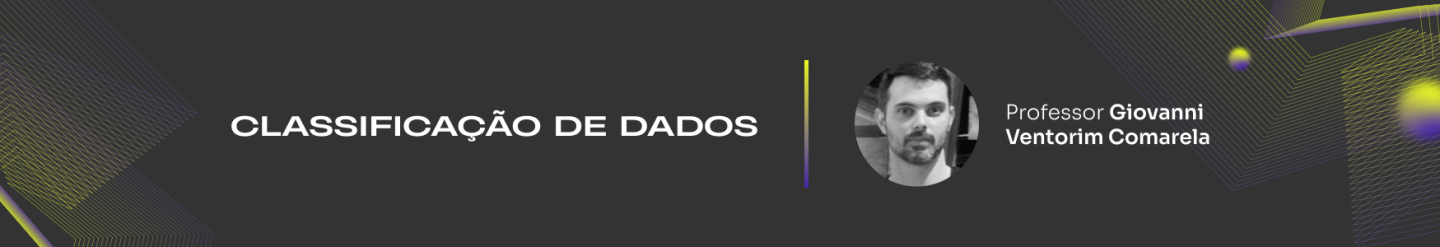

#*Bagging*, *Boosting* e *AdaBoost*

## Nosso problema de interesse

Dados $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, a tarefa de classificação consiste em encontrar um modelo $f$ que aprenda dos vetores de características os rótulos.

Há dois requisitos principais:

1. Se $(\mathbf{x}, y) \in D$, então $f(\mathbf{x}) = y$ com alta probabilidade.

2. A função aprendida deve ser **generalizável**. Se um novo $\mathbf{x}$ não pertencente ao conjunto $D$ for observado, deseja-se também que $f(\mathbf{x})$ seja o rótulo correto de $\mathbf{x}$ com alta probabilidade.

## Pergunta de hoje

É possível combinar classificadores já treinados para obter um classificador melhor?

Vamos ver que em algumas situações, sim!

### Vamos começar com um experimento simples

O código abaixo gera um bit aleatório. O bit assume valor 1 com probabilidade $p$ e valor 0 com probabilidade $1 - p$.

A saída da função ``random_bit`` é uma variável aleatória discreta com distribuição de Bernoulli.

In [ ]:
import random
import numpy as np

def random_bit(p = 0.5):
  if random.random() < p:
    return 1
  return 0

#### Pergunta 1


Se gerarmos $n$ bits, independentemente, é esperado que tenhamos quantos bits assumindo o valor 1?

O código abaixo mostra um experimento simples relacionado à pergunta acima.

In [ ]:
n = 1000    # número de bits da sequência
p = 0.6     # probabilidade de que cada bit tenha valor 1

bits = [random_bit(p) for i in range(n)]
print(np.sum(bits))

576


Como sugerido pelo experimento, espera-se que tenhamos $np$ bits com valor 1.

#### Pergunta 2

Se gerarmos $n$ bits, independentemente, qual chance de termos mais do que $\frac{n}{2}$ bits com valor 1?

Vamos repetir o experimento acima 10 vezes e verificar em quantas sequências de bits (de tamanho $n$) teremos mais do que $\frac{n}{2}$ bits com valor 1.

In [ ]:
n = 101
p = 0.51

for i in range(10):
  bits = [random_bit(p) for i in range(n)]
  print('Experimento %d. Mais do que a metade dos bits são 1: %d' % (i, np.sum(bits) > n / 2))

Experimento 0. Mais do que a metade dos bits são 1: 1
Experimento 1. Mais do que a metade dos bits são 1: 1
Experimento 2. Mais do que a metade dos bits são 1: 0
Experimento 3. Mais do que a metade dos bits são 1: 0
Experimento 4. Mais do que a metade dos bits são 1: 1
Experimento 5. Mais do que a metade dos bits são 1: 1
Experimento 6. Mais do que a metade dos bits são 1: 1
Experimento 7. Mais do que a metade dos bits são 1: 0
Experimento 8. Mais do que a metade dos bits são 1: 0
Experimento 9. Mais do que a metade dos bits são 1: 1


Se variarmos o valor de $p$ no código acima, podemos perceber que, mesmo com valores pouco maiores que $p = 0.5$, teremos a maioria das sequências com mais do que $\frac{n}{2}$ bits 1.

Para verificar a afirmação acima, vamos repetir o experimento mais vezes.

In [ ]:
n = 101
p = 0.55

N = 1000         # repetindo 1000 vezes
more_than_half = 0 # número de vezes que cada sequência tem mais que n/2 bits 1

for i in range(N):
  bits = [random_bit(p) for i in range(n)]
  if np.sum(bits) >= n / 2:
    more_than_half += 1
print(more_than_half / N)

0.822


De fato, mesmo que $p$ seja pouco maior do que 0.5, tem-se que, a chance de se gerar uma sequência com mais do que a metade de bits 1 é alta! Em geral, significativamente maior do que $p$.

Mas como isso nos ajuda no problema de Classificação de Dados?

### Vamos trazer isso para o contexto de classificação

Suponha um problema de classificação binária (as classes podem ser 0 ou 1) e que você queira classificar um objeto $\mathbf{x}$. Você tem a sua disposição:
- $n$ classificadores já treinados, $C_1, \dots, C_n$

Sabe-se que:
- cada classificador, $C_i$, classifica $\mathbf{x}$ corretamente com probabilidade $p$
- $C_1, \dots, C_n$ são independentes

**Observação:** vamos focar no caso de classificação binária por simplicidade. Todo o raciocínio pode ser generalizado para o caso multiclasse.

#### Na média, quantos classificadores vão acertar a classe de $\mathbf{x}$?

Espera-se que $np$ classificadores acertem.

Mas isso ajuda a gente a classificar $\mathbf{x}$? Vamos mostrar que sim!

Considere agora o seguinte classificador, $C$:
$$
C(\mathbf{x}) =
\begin{cases}
  1, \sum_{i=1}^nC_i(\mathbf{x}) \ge \frac{n}{2}\\
  0, \text{caso contrário}
\end{cases}
$$
Em outras palavras, $C$ representa o voto da maioria.

#### Qual a chance de $C$ acertar a classe de $\mathbf{x}$?

$C$ acerta quando ao menos $\frac{n}{2}$ $C_i$'s acertam. Vamos transformar isso em números. Defina as seguintes variáveis indicadoras:
$$
I_i(\mathbf{x}) =
\begin{cases}
1, \text{se } C_i(\mathbf{x}) \text{ está correta}\\
0, \text{caso contrário}
\end{cases}
$$

Assim, $C(\mathbf{x})$ está correta se, e somente se, $\sum_{i = 1}^nI_i(\mathbf{x}) \ge \frac{n}{2}$.

Bom, veja que esse é exatamente o mesmo caso do nosso experimento anterior. Saber se $C(\mathbf{x})$ está correta é o mesmo que saber a chance de uma sequência de $n$ bits ter mais do que $\frac{n}{2}$ bits 1.

Vimos como essa quantidade se comporta de maneira empírica.

Teoricamente, como cada $I_i(\mathbf{x})$ é uma variável aleatória com distribuição de *Bernoulli* e como as variáveis $I_i$'s são independentes, temos que a soma dessas variáveis indicadoras tem uma distribuição *Binomial* com parâmetros $n$ e $p$.

Dessa forma, pode-se mostrar que:
$$
\begin{eqnarray}
  P(C(\mathbf{x}) \text{ estar correta}) = P\left(\sum_{i=1}^nI_i(\mathbf{x}) \ge \frac{n}{2}\right) = \sum_{j = \frac{n}{2}}^n\binom{n}{j}p^j(1-p)^{n-j}
\end{eqnarray}
$$

A Figura abaixo mostra o impacto de $n$ e $p$ na probabilidade de o classificador $C$ acertar a classe de um elemento $\mathbf{x}$ qualquer.

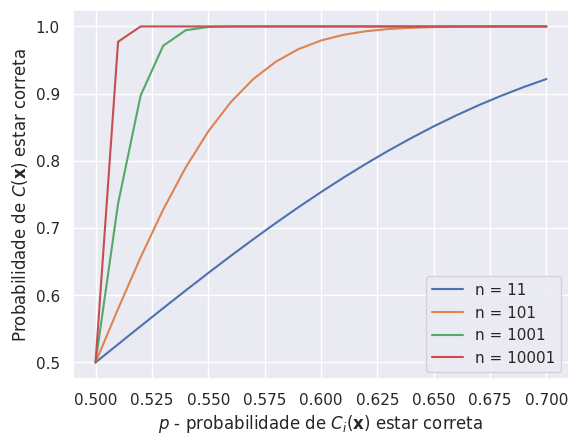

In [ ]:
#@title Impacto de $n$ e $p$ na probabilidade de $C$ acertar

from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set()

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
def succes_prob(n, p):
  return binom.sf(k = int(math.ceil(n / 2)) - 1, n = n, p = p)

p_values = np.arange(0.5, 0.71, 0.01)
n_values = [11, 101, 1001, 10001]

for n in n_values:
  plt.plot(p_values, succes_prob(n, p_values), label = 'n = %d' % n)

plt.xlabel(r'$p$ - probabilidade de $C_i(\mathbf{x})$ estar correta')
plt.ylabel(r'Probabilidade de $C(\mathbf{x})$ estar correta')
plt.legend(loc = 'best');

#### Em resumo

Se tivermos um grande número de classificadores independentes com chance de acerto superior a 50%, mesmo que medíocres, podemos combiná-los, através do voto da maioria, e ter um resultado **consideravelmente melhor**.

## Questão Relevante

Como obter um número grande de classificadores que sejam **independentes** e tenham uma taxa de acerto **melhor que 50%**?

Na prática, encontrar um grande número de classificadores independentes é uma tarefa MUITO difícil. Vamos buscar então por um grande número de classificadores **não correlacionados**.

## *Bagging*

Termo formado pela junção das palavras *Bootstrap* e *aggregation*.

A ideia é criar um conjunto de classificadores pouco correlacionados fazendo uso de **amostragem com reposição**.

### Entrada

1. Um conjunto de treinamento $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$
2. Um algoritmo de aprendizado $\mathcal{A}$
>$\mathcal{A}$ pode ser KNN, Árvore de Decisão, Regressão Logística, ...
3. Um inteiro $K$

### Passo 1



Crie $K$ subamostras de $D$ através de amostragem com reposição. Denote as novas amostras por $D_1, \dots, D_K$

Essas amostras podem ter um tamanho menor que o conjunto de dados original.

**Observação:** como a amostragem é feita com reposição, um mesmo par $(\mathbf{x}, y) \in D$ pode aparecer em mais de um $D_i$ e até mesmo aparecer mais de uma vez uma dada amostra.

### Passo 2

Treine um classificador, usando o algoritmo $\mathcal{A}$, para cada subamostra. Defina por $C_i$ o classificador obtido com o conjunto $D_i$.

Repare que o treinamento de cada classificador não depende em nada dos demais. Assim, o treinamento pode ser efetuado em paralelo.

### *Bagging* - Intuição

Considere o conjunto de dados representado na figura abaixo (já utilizado em aulas passadas)

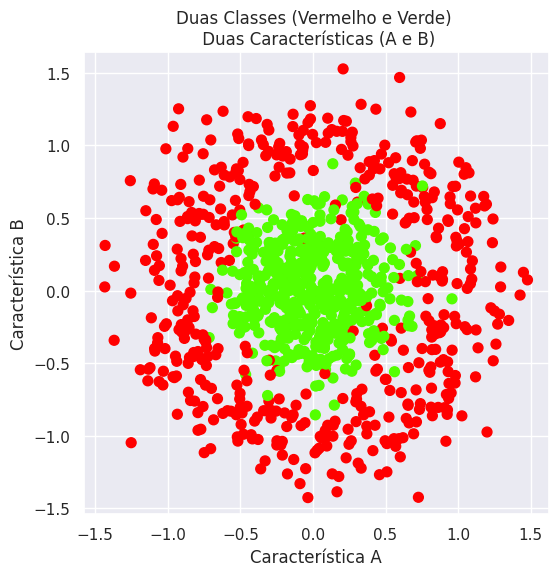

In [ ]:
#@title
import sklearn.datasets as datasets
from sklearn.datasets import make_moons

sns.set()

X, y = datasets.make_circles(n_samples = 1000, noise=.2, factor=.3, random_state=1)

plt.figure(figsize = (6,6))
plt.prism()  # this sets a nice color map
plt.scatter(X[:, 0], X[:, 1], c=y, s = 50)
plt.axis('equal');

plt.xlabel('Característica A')
plt.ylabel('Característica B')
plt.title('Duas Classes (Vermelho e Verde) \n Duas Características (A e B)');

Vamos dividir os dados em conjuntos de treino e teste.

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
#@title

from  matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

class SimpleAggregationClassifier:
  def __init__(self, base_classifiers):
    self.base_classifiers = base_classifiers

  def predict(self, X):
    y = np.zeros(X.shape[0])
    for clf in self.base_classifiers:
      y += clf.predict(X)
    return np.round(y / len(self.base_classifiers))

  def score(self, X, y):
    return accuracy_score(y, self.predict(X))

def plot_decision_boundary_tree(X_train, y_train, X_test, y_test, dtc):

  x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
  y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1

  plot_step = 0.01
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

  Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)

  plt.figure(figsize = (12, 6))
  plt.subplot(1, 2, 1)
  cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
  plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 50)
  plt.axis('equal')
  plt.axis('off')
  #plt.xlim((x_min, x_max))
  #plt.ylim((y_min, y_max))
  plt.title('Conjunto de Treinamento\nAcurácia: %.2f\nF1-Score: %.2f' % (dtc.score(X_train, y_train), f1_score(y_train, dtc.predict(X_train))));

  plt.subplot(1, 2, 2)
  cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
  plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 50)
  plt.axis('equal')
  plt.axis('off')
  #plt.xlim((x_min, x_max))
  #plt.ylim((y_min, y_max))
  plt.title('Conjunto de Teste\nAcurácia: %.2f\nF1-Score: %.2f' % (dtc.score(X_test, y_test), f1_score(y_test, dtc.predict(X_test))));


Vamos agora, utilizar *bagging* para criar várias amostras pequenas do conjunto de treinamento.

Cada amostra será utilizada para treinar uma Árvore de Decisão.

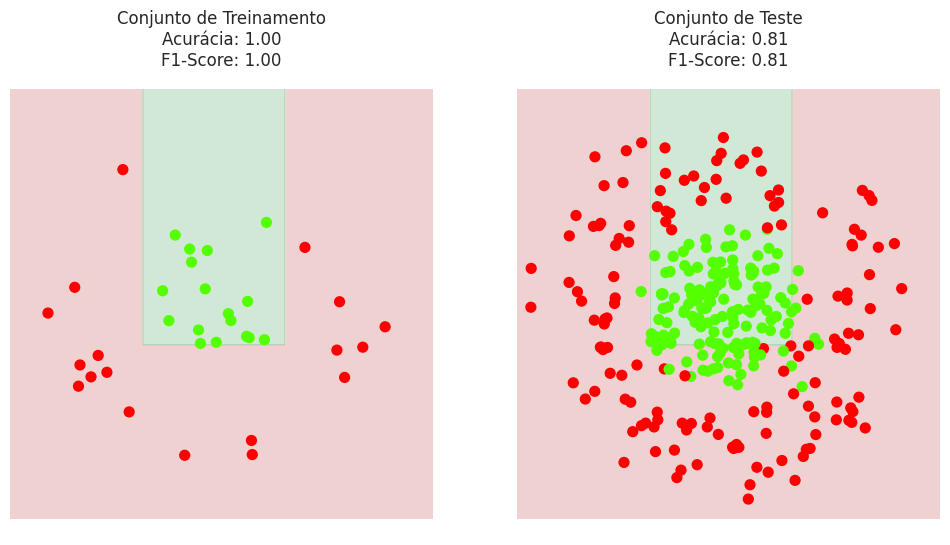

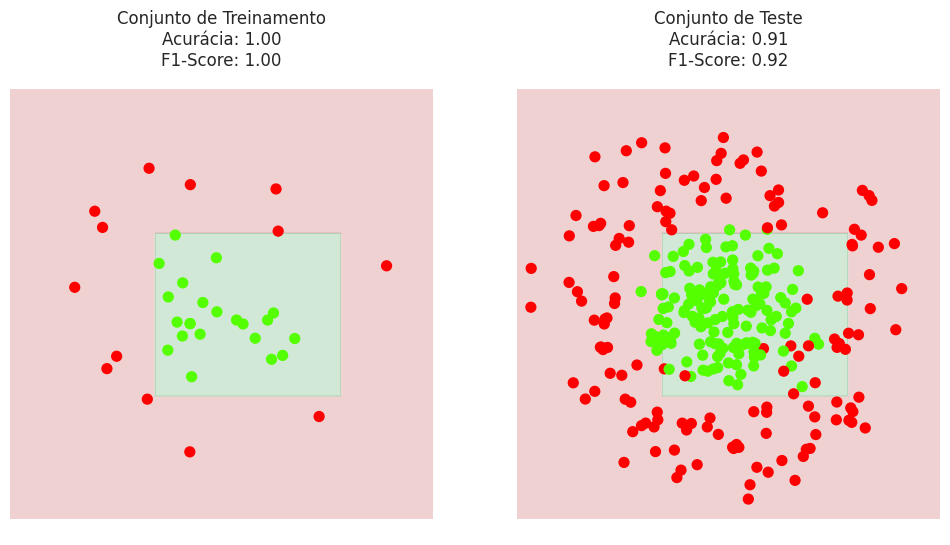

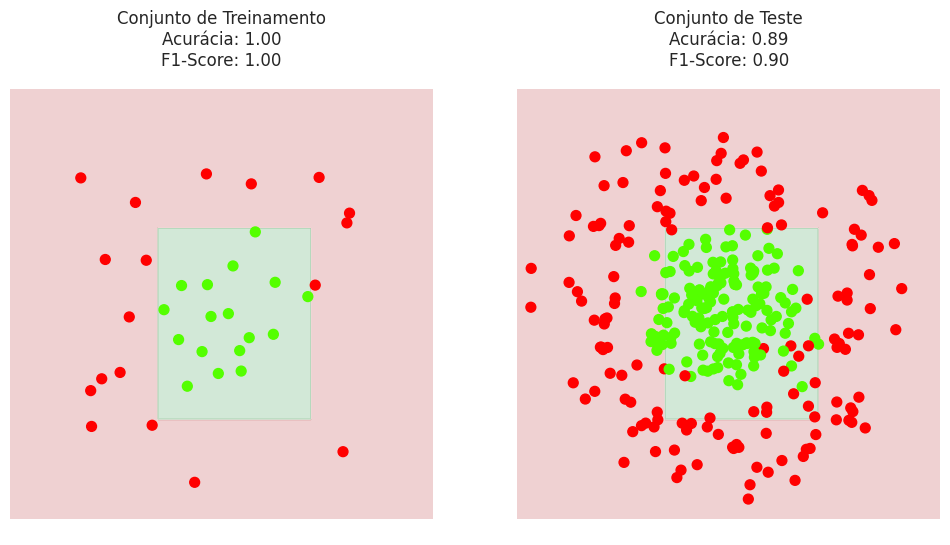

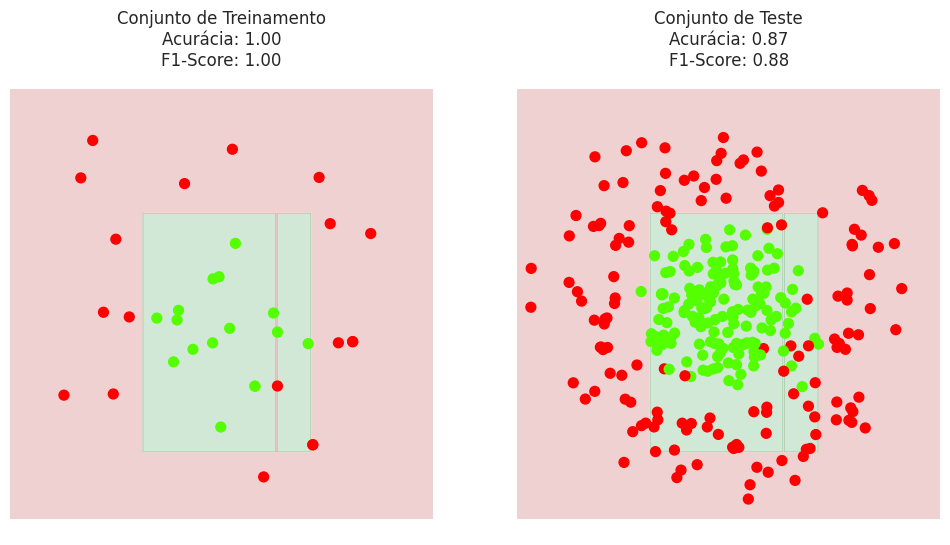

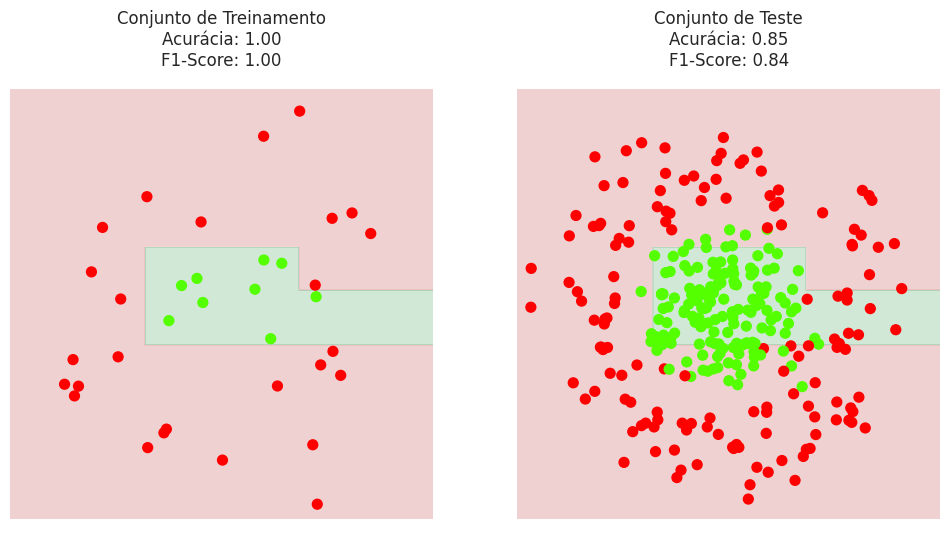

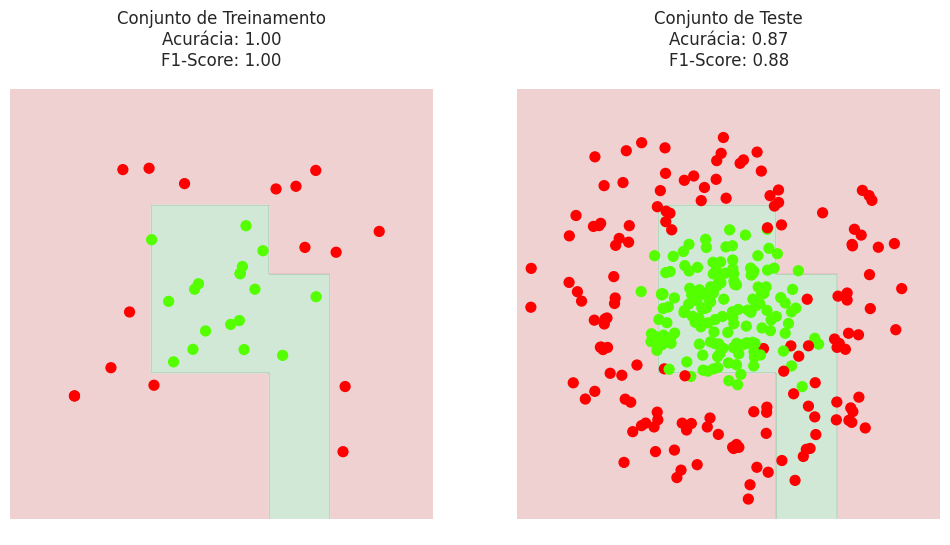

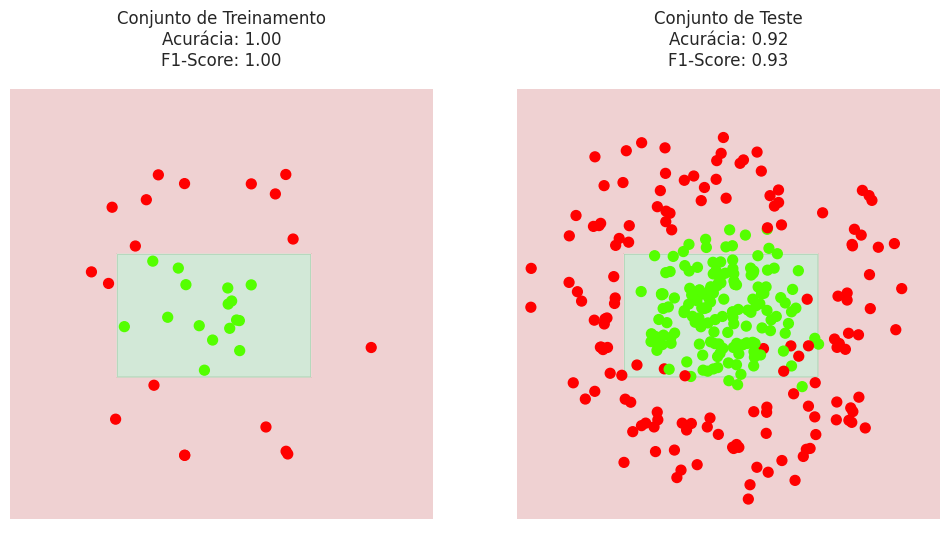

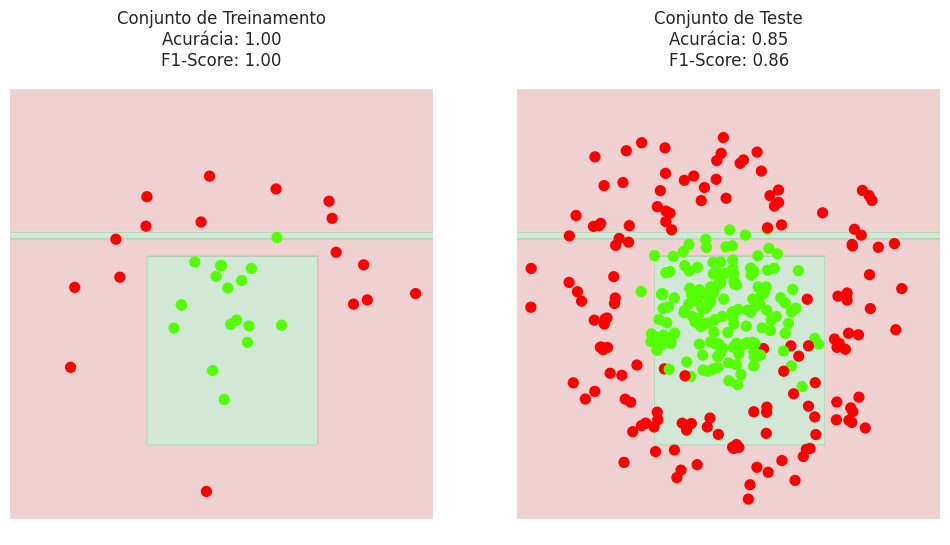

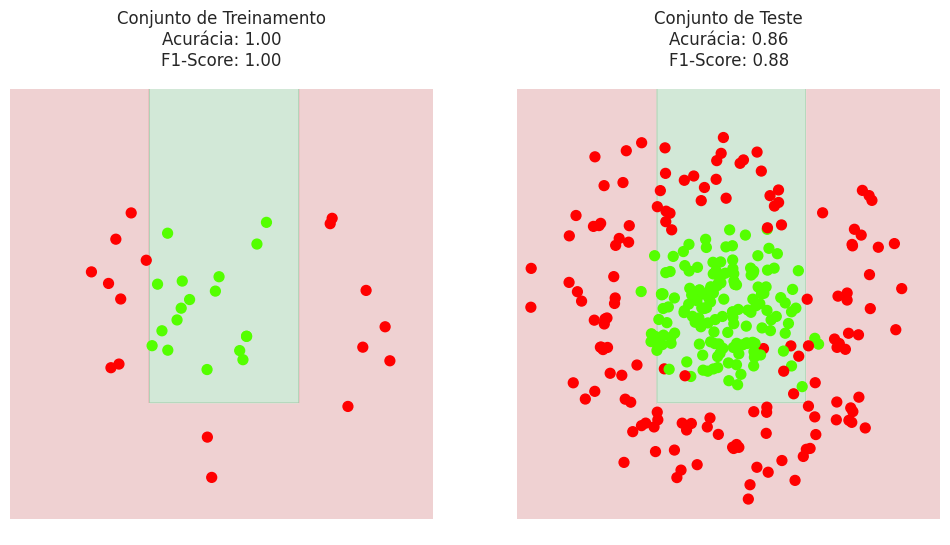

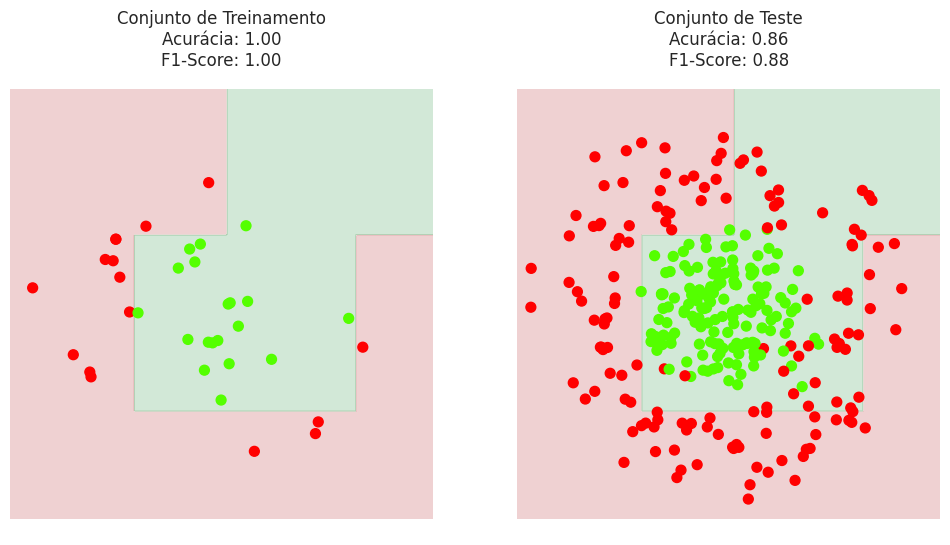

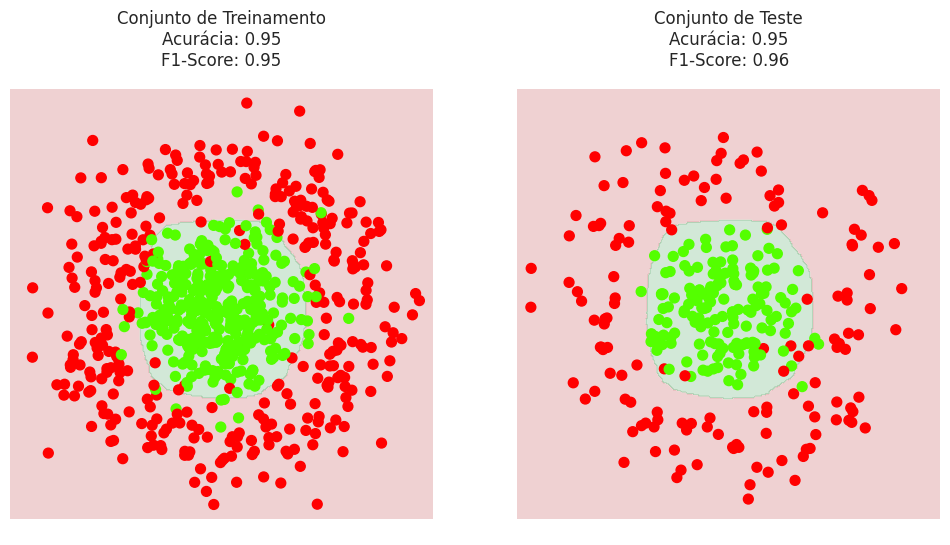

In [ ]:
import numpy as np
import sklearn.tree as tree
from sklearn.neighbors import KNeighborsClassifier

K = 10001 # número de amostras
f = 0.05  # cada amostra tem tamanho de 5% do conjunto de treinamento

idx = list(range(X_train.shape[0]))
classifiers = []

np.random.seed(42)
for i in range(K):

  # fazendo a amostragem com reposição
  idx_sample = np.random.choice(idx, size = int(f * len(idx)), replace = True)
  X_train_sample = X_train[idx_sample, :]
  y_train_sample = y_train[idx_sample]

  # treinando uma árvore de decisão
  dtc = tree.DecisionTreeClassifier(random_state = 42)
  dtc.fit(X_train_sample, y_train_sample)
  classifiers.append(dtc)

  # Vamos visualizar o que ocorre com alguns casos
  if i < 10:
    plot_decision_boundary_tree(X_train_sample, y_train_sample, X_test, y_test, dtc)

# Realizando o voto da maioria para cada elemento do conjunto de teste
bgg = SimpleAggregationClassifier(classifiers)
plot_decision_boundary_tree(X_train, y_train, X_test, y_test, bgg)

Pode-se observar que, no geral, cada Árvore de Decisão tem uma taxa de acerto moderada.

No entanto, quando agregamos as votações de todas as árvores, foi possível identificar bem a fronteira de separação entre as classes (com uma taxa de acerto superior a das árvores).

### *Bagging* na ``scikit-learn``

A biblioteca ``scikit-learn`` possui um módulo específico para [*Bagging*](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).

O módulo permite configurar:
- o classificador base;
- o números de classificadores a serem criados;
- a fração do conjunto de treinamento que deve ser amostrada (com reposição) para criar cada subamostra; e
- a fração das colunas da matriz de dados a serem consideradas em cada subamostra (veja que a ``scikit-learn`` permite realizar amostragem tanto nas linhas quanto nas colunas da matriz de dados do conjunto de treinamento.

Abaixo, um exemplo que:
-  utiliza 1001 classificadores Árvores de Decisão;
- cada Árvore deve ser treinada com todas as características (*features*) disponíveis
- e cada subamostra é uma amostra aleatória (feita com reposição) de 5% do conjunto de treinamento.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

bagging = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators = 1001,
                            max_samples = 0.05, max_features = 1.0)

bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       144
           1       0.94      0.97      0.96       156

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## *Boosting*

O conceito de *Boosting* é uma evolução de *Bagging*.

Novamente, a ideia é criar diferentes conjuntos de treinamento.

No entanto, tenta-se selecionar cuidadosamente as instâncias que são difíceis de serem corretamente classificadas.

### Entrada

1. Um conjunto de treinamento $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$
2. Um algoritmo de aprendizado $\mathcal{A}$
>$\mathcal{A}$ pode ser KNN, Árvore de Decisão, Regressão Logística, ...
3. Um inteiro $K$

### Algoritmo treinamento

**Passo 1:**
> Um conjunto de treinamento $D_1$ é formado através de amostragem com reposição a partir de $D$.

> Um classificador $C_1$ é treinado em $D_1$ utilizando $\mathcal{A}$. A taxa de erro (em $D$) de $C_1$ é calculada;

**Passo 2:**
>Um conjunto de treinamento $D_2$ é formado através de amostragem com reposição a partir de $D$. As instâncias classificadas incorretamente por $C_1$ têm maior probabilidade de estarem na amostra $D_2$.

> Um classificador $C_2$ é treinado em $D_2$ utilizando $\mathcal{A}$. A taxa de erro (em $D$) de $C_2$ é calculada;

**Passo 3:**
>Um conjunto de treinamento $D_3$ é formado através de amostragem com reposição a partir de $D$. As instâncias classificadas incorretamente por $C_1$ ou $C_2$ têm maior probabilidade de estarem na amostra $D_3$.

> Um classificador $C_3$ é treinado em $D_3$ utilizando $\mathcal{A}$. A taxa de erro (em $D$) de $C_3$ é calculada;

**...**

**Passo K:**
>Um conjunto de treinamento $D_K$ é formado através de amostragem com reposição a partir de $D$. As instâncias classificadas incorretamente por $C_1, C_2, \dots, C_{K-1}$ têm maior probabilidade de estarem na amostra $D_K$.

> Um classificador $C_K$ é treinado em $D_K$ utilizando $\mathcal{A}$. A taxa de erro (em $D$) de $C_K$ é calculada;


### Algoritmo de Classificação

Dado um elemento $\mathbf{x}$ a ser classificado:

1. Obtenha a classe de $\mathbf{x}$ de acordo com os $K$ classificadores treinados na etapa de treinamento, $C_1, C_2, \dots, C_K$.

2. Utilize o voto da maioria dos classificadores $C_1, C_2, \dots, C_K$ para obter a classe de $\mathbf{x}$. No entanto, pondere o voto de cada classificador com sua respectiva taxa de acerto no conjunto de treinamento. **Em resumo**, os classificadores com menores taxas de erro terão mais importância durante a fase de classificação.

O algoritmo acima representa uma descrição da **ideia geral** de *boosting* e pode ser instanciado de diversas maneiras.

Umas das variações mais populares é chamada *AdaBoost* (de *Adaptative Boosting*). Uma descrição detalhada do *AdaBoost* está fora do escopo deste material. Aos interessados, recomenda-se a leitura do material disponível [aqui](https://dataminingbook.info/book_html/) (Capítulo 22).

### *AdaBoost* na ``scikit-learn``

A utilização de *AdaBoost* na ``scikit-learn`` segue o mesmo padrão de *Bagging*.

Os detalhes podem ser vistos na [documentacão](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) da biblioteca.

Abaixo, um exemplo utilizando Árvore de Decisão como classificador base. São utilizadas 1001 árvores.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

ada = AdaBoostClassifier(tree.DecisionTreeClassifier(), n_estimators = 1001)

ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       144
           1       0.92      0.97      0.94       156

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



## Referências

1. Capítulos 22 do *Livro Data Mining and Machine Learning: Fundamental Concepts and Algorithms* (https://dataminingbook.info/book_html/)